In [22]:
# Print the current working directory. sys.path.append works with relative paths, so this is useful to know.
import os
print(os.getcwd())

c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\files


In [1]:
import sys
sys.path.append('../drlfoil/')

In [1]:
import gymnasium as gym
import drlfoil
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [3]:
env = gym.make('AirfoilEnv-v0', n_params=8, max_steps=10, scale_actions = 0.15, airfoil_seed = [0.1*np.ones(8), -0.1*np.ones(8), 0.0],
                    delta_reward=False, cl_reward = True, cl_reset = 0.5, efficiency_param = 1, cl_wide = 20, render_mode="human",
                    n_boxes=1,
                    reynolds = 1e7)
model = PPO.load("logmodels/110524/110524_2_OneBox_TestRandomAirfoil_SeedNone_ReMin1e5_ReMax5e7_CLmax1.6/logs/best_model.zip", env=env)
#model = PPO.load("16042024_NewRewardCl_4_DeltaReward", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=15, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

In [4]:
# Enjoy trained agent
vec_env = model.get_env()
obs, _ = env.reset()

Step: 0, Action: [ 1.          1.          1.          1.          1.          1.
  1.          0.71234417 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.8594636 ], Reward: -100, Done: False, Info: {'step': 2, 'efficiency': 0.0, 'cl': 0.0}
Obs: [ 0.4         0.4         0.4         0.4         0.4         0.4
  0.4         0.25373864 -0.4        -0.4        -0.4        -0.4
 -0.4        -0.4        -0.4        -0.4        -0.24881369]


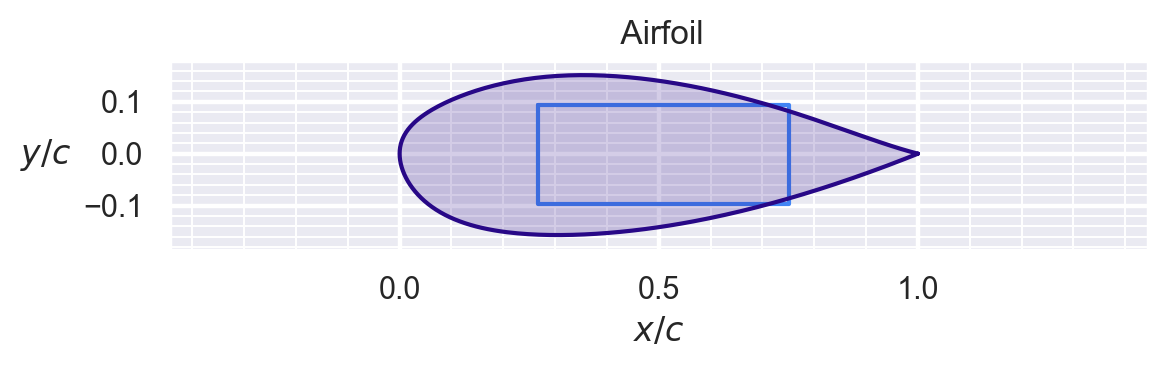

Step: 1, Action: [ 1.          1.          1.          1.          0.3589707   0.99447155
  1.          0.7253687  -1.          0.5354321   1.         -0.42990345
 -1.         -1.         -1.         -1.         -1.        ], Reward: 25.547147478891986, Done: False, Info: {'step': 3, 'efficiency': 25.97702221101413, 'cl': 0.4711151247152343}
Obs: [ 0.55        0.55        0.55        0.55        0.45384562  0.54917073
  0.55        0.36254394 -0.55       -0.3196852  -0.25       -0.46448553
 -0.55       -0.55       -0.55       -0.55       -0.3988137 ]


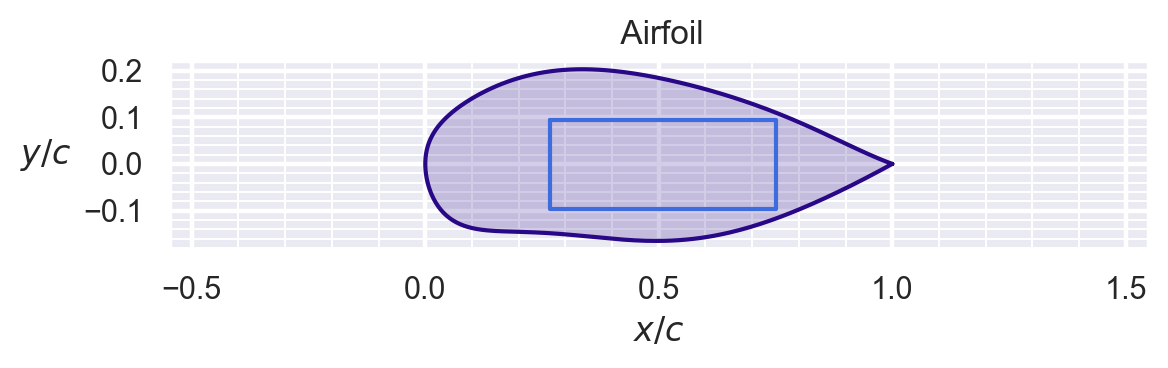

Step: 2, Action: [ 0.68673253  1.          0.07887582  1.         -0.81307733 -1.
 -0.74299127  1.         -1.         -0.14923859 -0.90781343  0.37783614
  1.         -0.16563895 -0.4277088  -1.         -1.        ], Reward: -100, Done: False, Info: {'step': 4, 'efficiency': 25.97702221101413, 'cl': 0.4711151247152343}
Obs: [ 0.6530099   0.70000005  0.5618314   0.70000005  0.33188403  0.39917076
  0.4385513   0.5125439  -0.70000005 -0.342071   -0.38617203 -0.40781012
 -0.4        -0.57484585 -0.61415637 -0.70000005 -0.5488137 ]


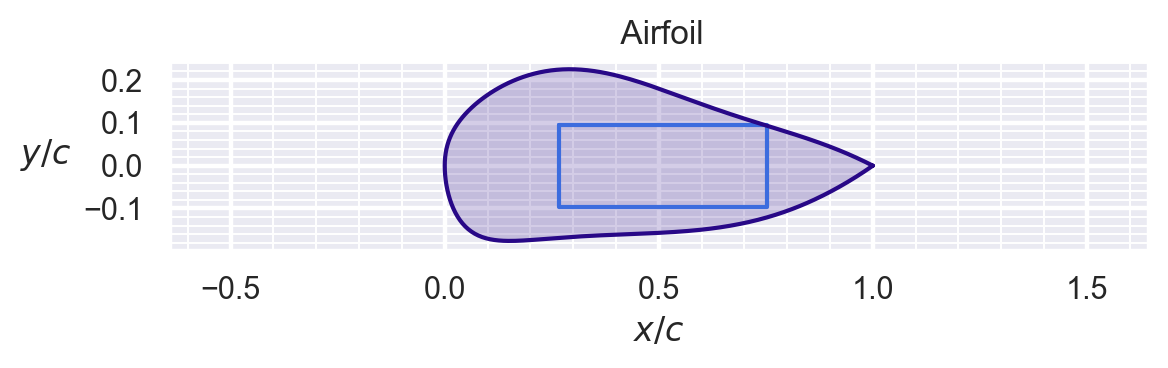

Step: 3, Action: [ 0.16312172 -0.54400355  0.7359923  -1.          1.          0.50240535
  1.          0.29043224 -0.0284313   0.648269   -0.12670505 -0.18887675
  0.07584821  0.04863508 -1.         -0.6139692   0.08459749], Reward: 22.803817058725542, Done: False, Info: {'step': 5, 'efficiency': 29.832687788199415, 'cl': 0.61590443502941}
Obs: [ 0.67747813  0.6183995   0.67223024  0.55        0.48188403  0.47453156
  0.58855134  0.5561088  -0.7042647  -0.24483064 -0.4051778  -0.4361416
 -0.3886228  -0.5675506  -0.76415634 -0.7920954  -0.53612405]


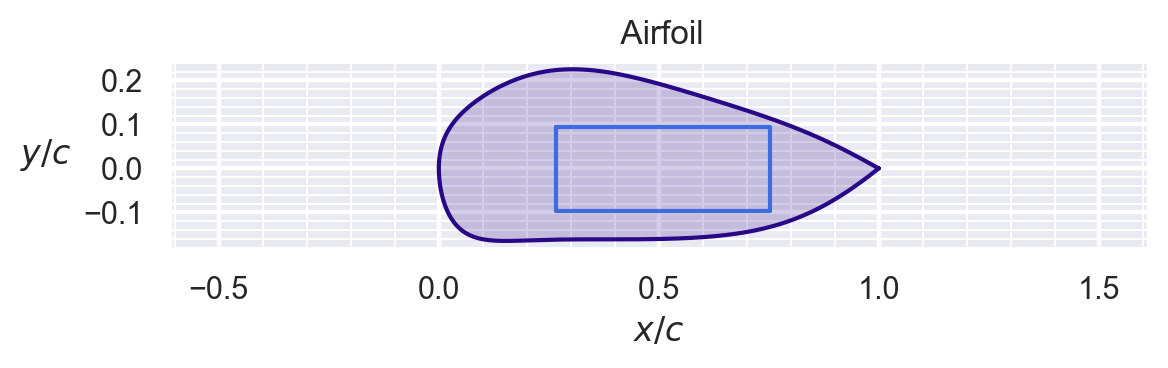

Step: 4, Action: [ 0.4556638   0.35179633  0.53136873 -1.         -0.03808725 -1.
 -1.          0.28598115 -0.23537341 -0.1768972  -0.21994433 -0.5232748
  0.61726     1.          0.7815392  -0.50974536 -1.        ], Reward: -100, Done: False, Info: {'step': 6, 'efficiency': 29.832687788199415, 'cl': 0.61590443502941}
Obs: [ 0.74582773  0.6711689   0.75193554  0.4         0.47617093  0.32453156
  0.4385513   0.59900594 -0.73957074 -0.27136523 -0.43816945 -0.5146328
 -0.29603377 -0.4175506  -0.64692545 -0.8685572  -0.6861241 ]


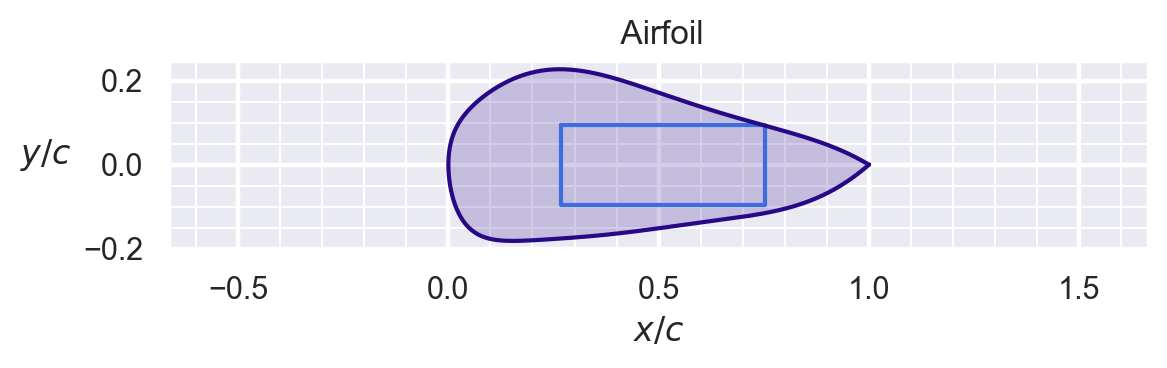

Step: 5, Action: [ 1.         -0.27805775  1.         -0.7124548   0.8281217   1.
  1.         -1.         -0.00976824  0.83993804  0.44333687 -0.2321833
 -1.         -0.2925438  -0.16266596 -0.903296    0.3932216 ], Reward: 24.446716099609837, Done: False, Info: {'step': 7, 'efficiency': 33.4655087717913, 'cl': 0.6253035162101528}
Obs: [ 0.8958277   0.6294603   0.9019356   0.2931318   0.6003892   0.47453156
  0.58855134  0.44900593 -0.741036   -0.14537449 -0.3716689  -0.54946035
 -0.44603378 -0.46143216 -0.6713254  -1.0040516  -0.6271408 ]


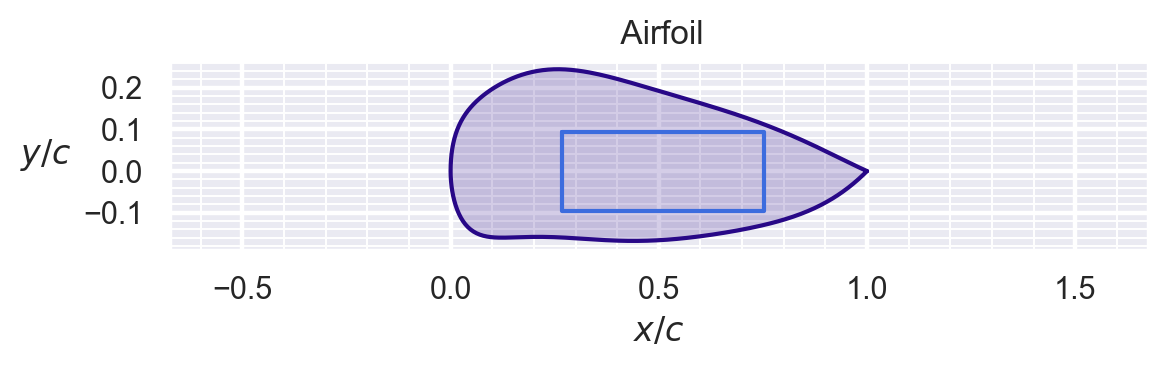

Step: 6, Action: [-0.64283776 -0.08943814 -0.16231674 -0.29591355 -0.4673376  -1.
 -0.5168332   1.         -0.06826112 -0.27300307 -0.4341981   1.
  0.28057885  0.6971551   1.         -0.3817254  -0.97404724], Reward: 32.17312641527299, Done: False, Info: {'step': 8, 'efficiency': 33.465493749698766, 'cl': 0.4556246972176863}
Obs: [ 0.79940206  0.6160446   0.87758803  0.24874476  0.5302886   0.32453156
  0.5110263   0.59900594 -0.7512751  -0.18632495 -0.43679863 -0.39946035
 -0.40394697 -0.35685888 -0.52132535 -1.0613104  -0.77324796]


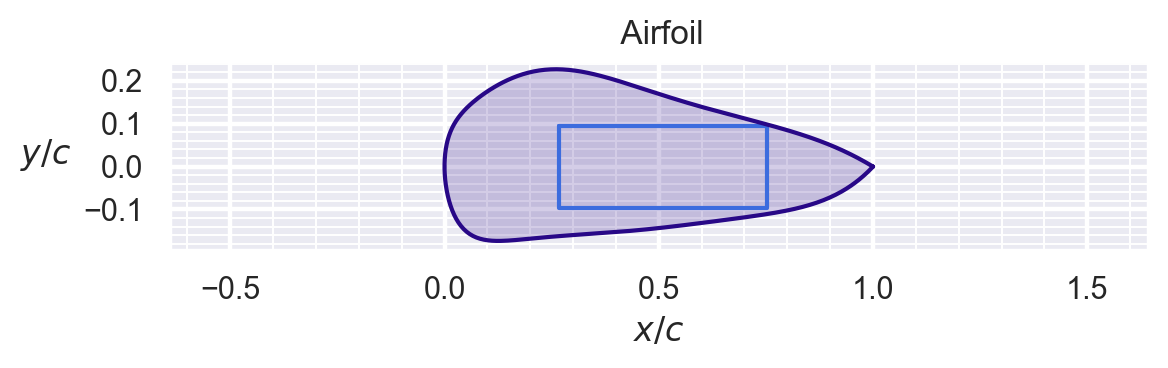

Step: 7, Action: [ 0.8084157   0.0079954   1.          0.21533225  1.          1.
  1.         -1.         -0.0334932   0.683508   -0.43917486 -0.64981526
 -1.         -0.33733943 -0.3328556  -1.          0.3428952 ], Reward: 25.727201442444485, Done: False, Info: {'step': 9, 'efficiency': 30.54491077256778, 'cl': 0.5926415756734438}
Obs: [ 0.9206644   0.6172439   1.027588    0.2810446   0.68028855  0.47453156
  0.66102636  0.44900593 -0.75629914 -0.08379876 -0.5026749  -0.49693263
 -0.553947   -0.4074598  -0.5712537  -1.2113104  -0.7218137 ]


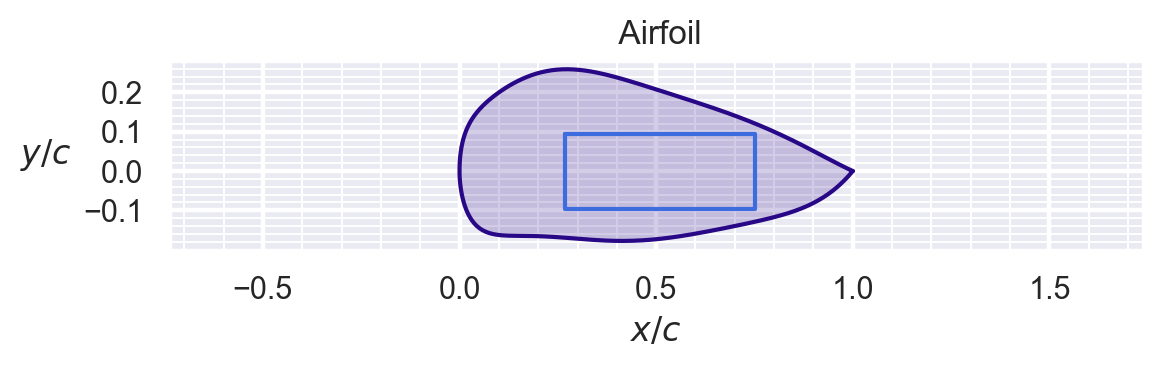

Step: 8, Action: [-0.6075835  -0.3308905  -0.20867151 -1.         -0.777137   -1.
 -1.          1.         -0.0854312  -0.25082344  0.38985416  1.
  0.3869746   0.40655613  1.          0.10143182 -1.        ], Reward: 33.86621254649902, Done: True, Info: {'step': 10, 'efficiency': 34.31351420224192, 'cl': 0.4743860981952077}
Obs: [ 0.8295269   0.56761026  0.99628735  0.13104458  0.563718    0.32453156
  0.5110263   0.59900594 -0.7691138  -0.12142228 -0.44419673 -0.34693262
 -0.49590078 -0.34647638 -0.42125368 -1.1960957  -0.87181365]


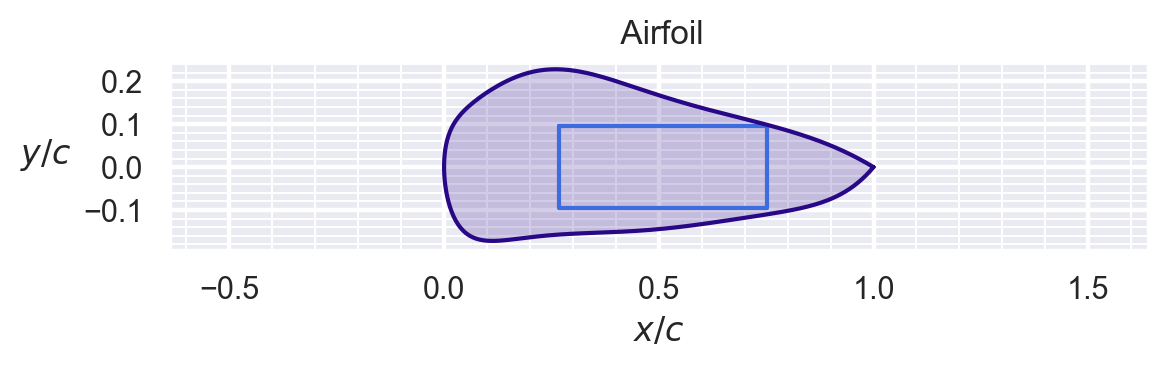

Step: 9, Action: [ 1.          1.          1.          1.          1.          1.
  1.         -0.01467478 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.7034555 ], Reward: -100, Done: False, Info: {'step': 1, 'efficiency': 0.0, 'cl': 0.0}
Obs: [ 0.25        0.25        0.25        0.25        0.25        0.25
  0.25        0.09779878 -0.25       -0.25       -0.25       -0.25
 -0.25       -0.25       -0.25       -0.25       -0.10551833]


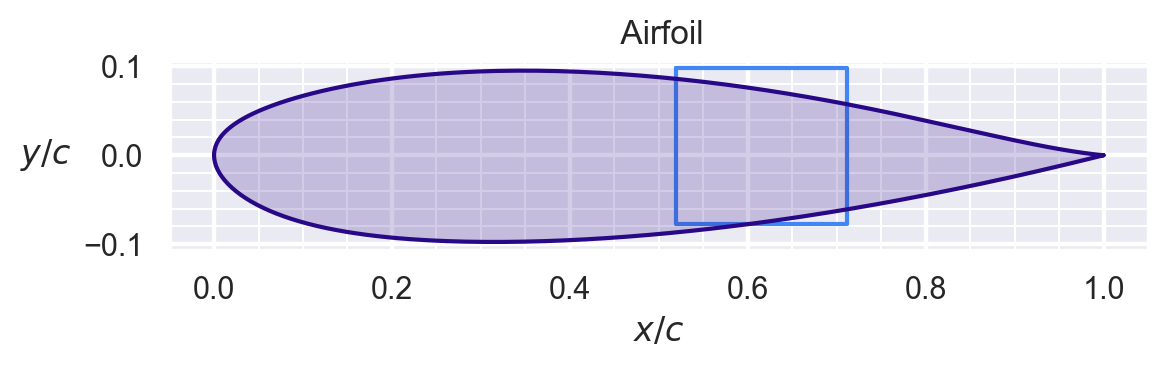

Step: 10, Action: [ 1.          1.          1.          1.          1.          1.
  1.          0.57978296 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.7839195 ], Reward: -100, Done: False, Info: {'step': 2, 'efficiency': 0.0, 'cl': 0.0}
Obs: [ 0.4         0.4         0.4         0.4         0.4         0.4
  0.4         0.18476623 -0.4        -0.4        -0.4        -0.4
 -0.4        -0.4        -0.4        -0.4        -0.22310627]


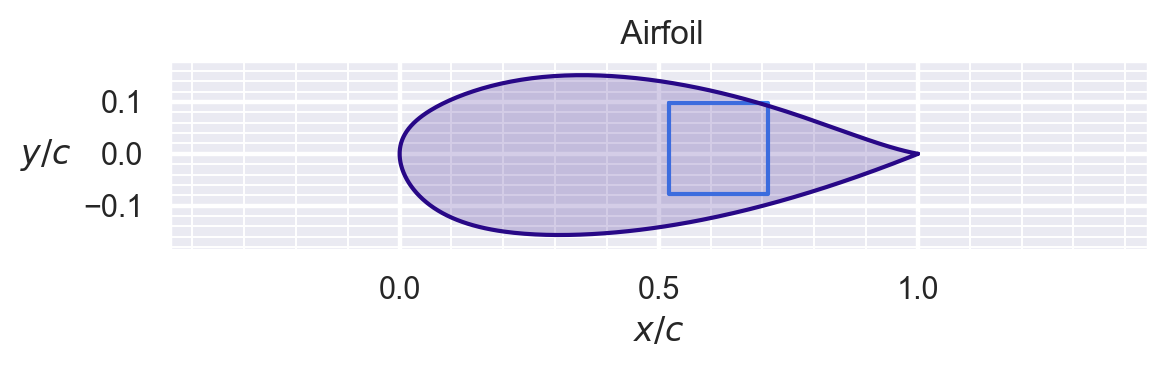

Step: 11, Action: [ 1.          1.          1.          1.          0.2658448   0.82698464
  1.          0.70716405 -1.          1.          1.          0.03810536
 -0.86983097 -1.         -1.         -1.         -1.        ], Reward: 30.151013884961937, Done: False, Info: {'step': 3, 'efficiency': 31.052407366084488, 'cl': 0.5383782403582892}
Obs: [ 0.55        0.55        0.55        0.55        0.43987674  0.52404773
  0.55        0.29084083 -0.55       -0.25       -0.25       -0.39428422
 -0.53047466 -0.55       -0.55       -0.55       -0.37310627]


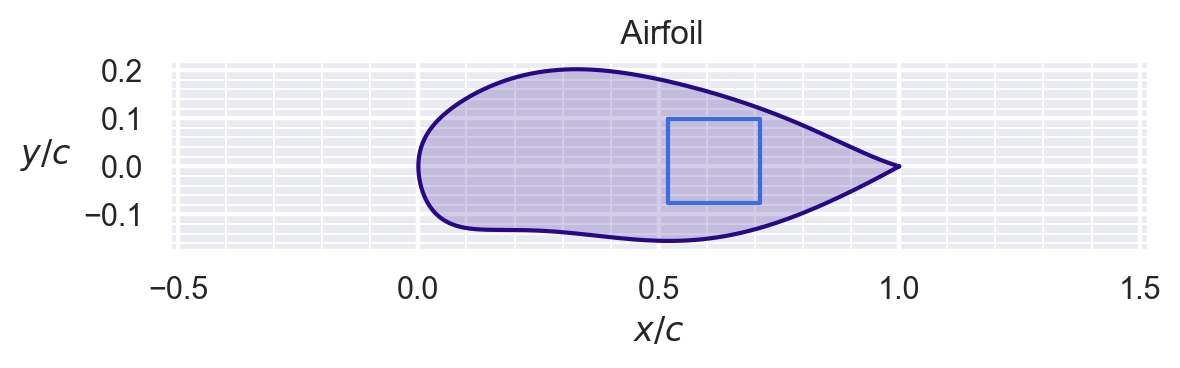

Step: 12, Action: [ 0.2329387   1.         -0.66364     0.41047975 -0.2960336  -1.
 -1.          1.         -0.9743086  -0.39185184 -0.94377303  0.25530306
  1.          0.378851    0.03249722 -1.         -1.        ], Reward: 34.99176808225608, Done: False, Info: {'step': 4, 'efficiency': 36.62571106321257, 'cl': 0.45223094847722545}
Obs: [ 0.58494085  0.70000005  0.450454    0.61157197  0.3954717   0.3740477
  0.4         0.44084084 -0.6961463  -0.30877778 -0.39156598 -0.35598874
 -0.38047466 -0.49317238 -0.5451254  -0.70000005 -0.5231063 ]


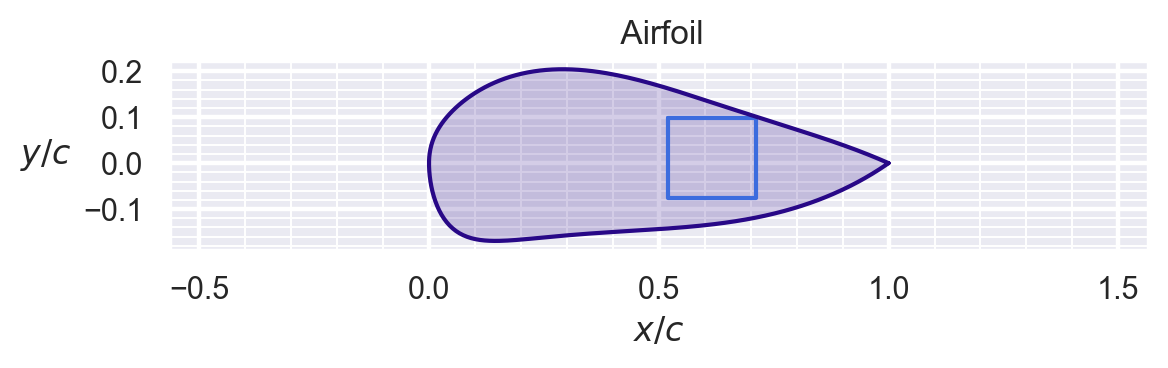

Step: 13, Action: [ 5.15024722e-01 -5.88518918e-01  1.00000000e+00 -9.81467247e-01
  8.69367480e-01  5.50637186e-01  1.00000000e+00 -1.08561344e-01
  4.78559732e-01  8.65774274e-01  3.66542757e-01 -6.69664800e-01
 -5.36858916e-01 -1.93760335e-01 -9.65053260e-01 -8.67216706e-01
 -4.12771478e-04], Reward: 23.045672101766872, Done: False, Info: {'step': 5, 'efficiency': 31.612491107509978, 'cl': 0.6257128355017381}
Obs: [ 0.66219455  0.6117222   0.60045403  0.4643519   0.5258768   0.45664328
  0.55        0.42455664 -0.62436235 -0.17891163 -0.33658457 -0.45643848
 -0.4610035  -0.5222364  -0.6898834  -0.83008254 -0.5231682 ]


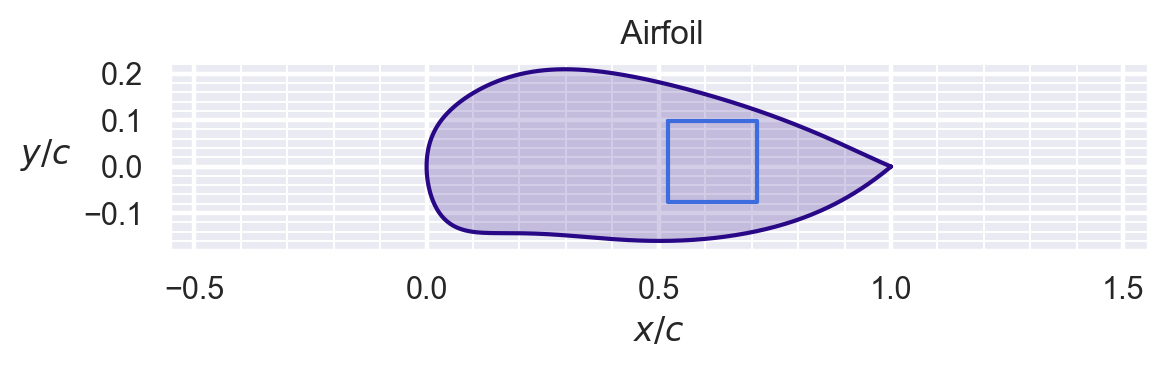

Step: 14, Action: [ 0.09377747  0.5778604   0.24249467 -1.         -0.11691255 -1.
 -1.          1.         -0.29616785 -0.3785619  -0.23973271  0.03279701
  1.          1.          1.         -0.10381868 -1.        ], Reward: 27.52865101888203, Done: False, Info: {'step': 6, 'efficiency': 33.20713806818262, 'cl': 0.4031657247364345}
Obs: [ 0.6762612   0.6984013   0.63682824  0.3143519   0.50833994  0.30664328
  0.4         0.57455665 -0.66878754 -0.23569593 -0.37254447 -0.45151892
 -0.3110035  -0.3722364  -0.53988343 -0.8456553  -0.6731682 ]


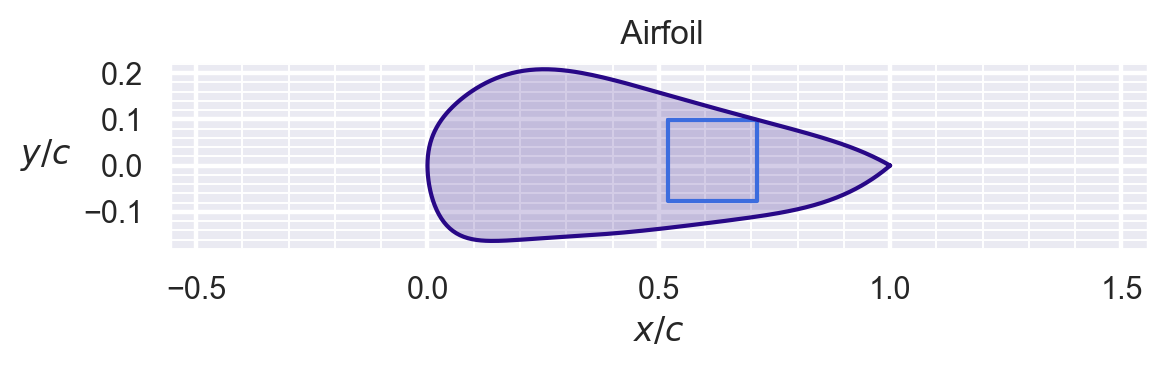

Step: 15, Action: [ 1.         -0.29508317  1.         -0.16070679  1.          1.
  1.         -1.         -0.05014575  0.902848    0.09724958 -0.84889024
 -1.         -0.31721538 -0.53751975 -1.          0.43118468], Reward: 28.57236362975218, Done: False, Info: {'step': 7, 'efficiency': 31.516461625127132, 'cl': 0.5700250157456848}
Obs: [ 0.82626116  0.65413874  0.7868282   0.29024586  0.6583399   0.45664328
  0.55        0.42455664 -0.6763094  -0.10026871 -0.35795704 -0.5788525
 -0.4610035  -0.41981873 -0.6205114  -0.99565536 -0.60849047]


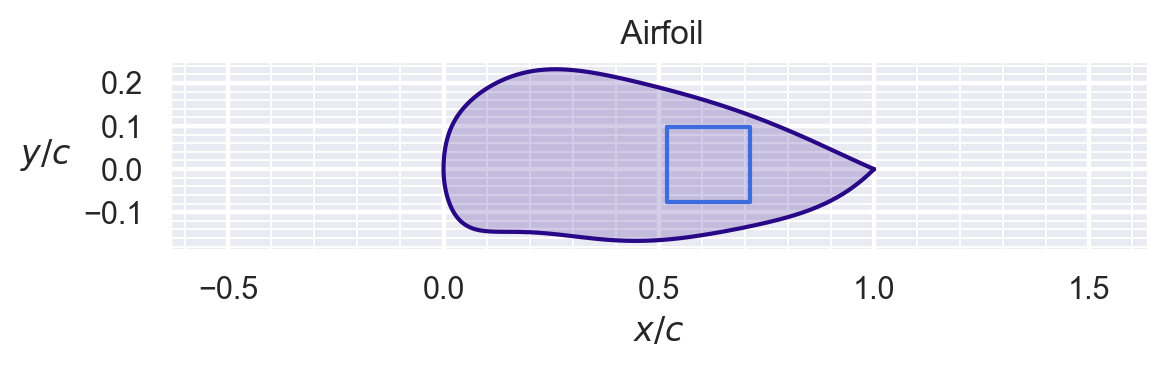

Step: 16, Action: [-0.3674382  -0.04036048  0.06014306 -1.         -0.80289215 -1.
 -1.          1.         -0.14652826 -0.34377867  0.09935668  1.
  0.74579215  0.9587699   1.          0.07835367 -1.        ], Reward: 31.329679182241453, Done: False, Info: {'step': 8, 'efficiency': 35.351895400650605, 'cl': 0.4222870203664235}
Obs: [ 0.77114546  0.6480847   0.7958497   0.14024587  0.5379061   0.30664328
  0.4         0.57455665 -0.6982886  -0.15183552 -0.34305352 -0.42885244
 -0.34913468 -0.27600324 -0.47051138 -0.9839023  -0.7584905 ]


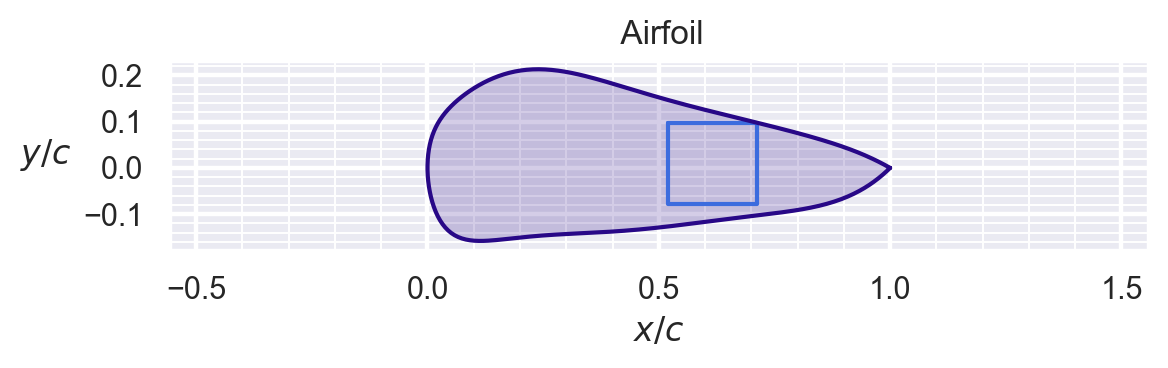

Step: 17, Action: [ 1.          0.0517008   1.          0.8298669   1.          1.
  1.         -1.         -0.01518757  0.791641   -0.747249   -0.8967413
 -1.         -0.6494162  -0.4656052  -1.          0.7285127 ], Reward: 29.6025110905726, Done: False, Info: {'step': 9, 'efficiency': 34.372453304281116, 'cl': 0.5864280844621255}
Obs: [ 0.92114544  0.6558398   0.9458497   0.2647259   0.68790615  0.45664328
  0.55        0.42455664 -0.70056677 -0.03308937 -0.4551409  -0.5633637
 -0.4991347  -0.37341568 -0.54035217 -1.1339023  -0.6492136 ]


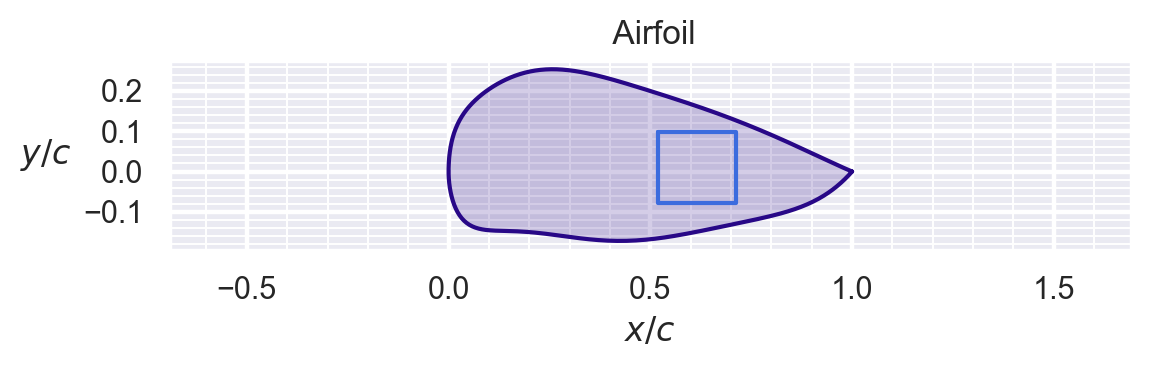

Step: 18, Action: [-0.8515062  -0.39580873 -0.30044279 -1.         -0.7267421  -1.
 -0.5384553   0.9067674  -0.23710373 -0.37815624  0.6240324   1.
  0.6182233   0.4545146   1.          0.5032102  -1.        ], Reward: 31.63680209986373, Done: True, Info: {'step': 10, 'efficiency': 34.852336949179026, 'cl': 0.4304302055612399}
Obs: [ 0.79341954  0.5964685   0.9007833   0.1147259   0.5788948   0.30664328
  0.46923172  0.56057173 -0.7361323  -0.0898128  -0.36153603 -0.41336364
 -0.4064012  -0.3052385  -0.39035216 -1.0584208  -0.7992136 ]


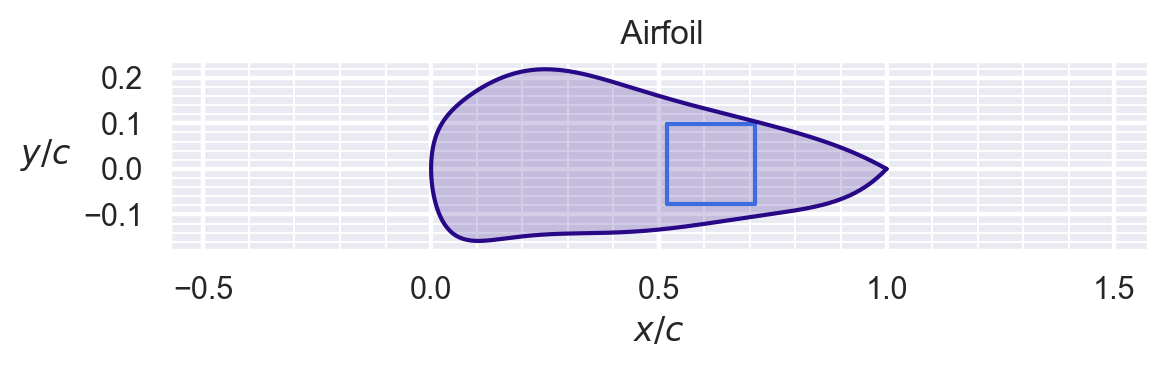

Step: 19, Action: [ 1.          1.          1.          1.          1.          1.
  1.          0.09504878 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.71270907], Reward: -100, Done: False, Info: {'step': 1, 'efficiency': 0.0, 'cl': 0.0}
Obs: [ 0.25        0.25        0.25        0.25        0.25        0.25
  0.25        0.11425732 -0.25       -0.25       -0.25       -0.25
 -0.25       -0.25       -0.25       -0.25       -0.10690636]


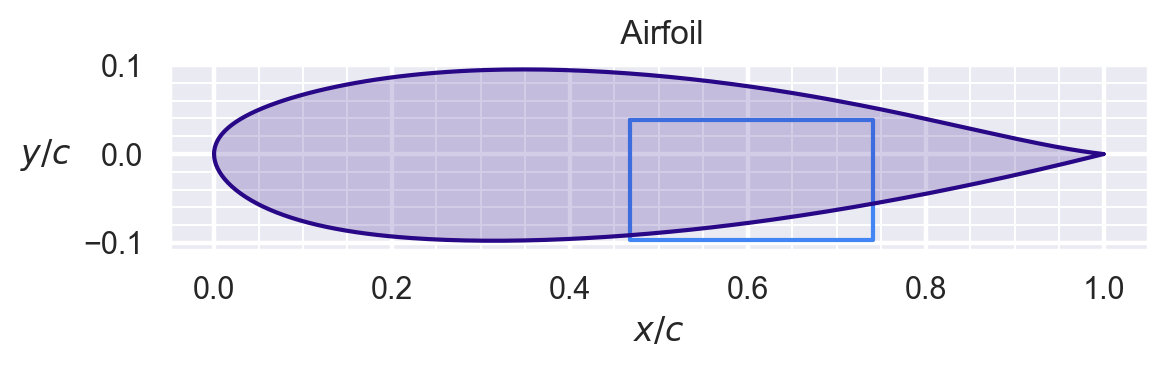

In [6]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)

    obs, reward, done, _, info = env.step(action)
    
    print(f"Step: {i}, Action: {action}, Reward: {reward}, Done: {done}, Info: {info}")
    print(f"Obs: {obs['airfoil']}")
    env.render()

    if done:
        obs, _ = env.reset()

